In [28]:
#preprocessing images
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt



In [29]:
tf.keras.layers.experimental.RandomFourierFeatures

keras.layers.kernelized.RandomFourierFeatures

In [30]:
datagen = preprocessing.image.ImageDataGenerator(rescale=1/255)# normalisation
train_generator = datagen.flow_from_directory(
        'datasets/spectogram/train',
        batch_size=10,
        target_size=(512,512),
        class_mode='binary')
val_generator = datagen.flow_from_directory(
        'datasets/spectogram/test',
        color_mode='rgb',
        target_size=(512,512),
        class_mode='binary')


Found 64 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [31]:
layers.experimental.RandomFourierFeatures?

Init signature:
layers.experimental.RandomFourierFeatures(
    output_dim,
    kernel_initializer='gaussian',
    scale=None,
    trainable=False,
    name=None,
    **kwargs,
)
Docstring:     
Layer that projects its inputs into a random feature space.

This layer implements a mapping from input space to a space with `output_dim`
dimensions, which approximates shift-invariant kernels. A kernel function
`K(x, y)` is shift-invariant if `K(x, y) == k(x - y)` for some function `k`.
Many popular Radial Basis Functions (RBF), including Gaussian and
Laplacian kernels, are shift-invariant.

The implementation of this layer is based on the following paper:
["Random Features for Large-Scale Kernel Machines"](
  https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)
by Ali Rahimi and Ben Recht.

The distribution from which the parameters of the random features map (layer)
are sampled determines which shift-invariant kernel the layer approximates
(see paper for more details). You ca

In [32]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.experimental.RandomFourierFeatures(output_dim=2048,scale=10,kernel_initializer='gaussian'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.hinge,
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()])

C:\Users\mansi\AppData\Local\Temp/ipykernel_15344/1896593364.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,validation_data=val_generator,shuffle=True,


Epoch 1/50
7/7 [==============================] - 20s 2s/step - loss: 3.9413 - accuracy: 0.4375 - true_negatives_7: 16.0000 - true_positives_7: 12.0000 - false_negatives_7: 20.0000 - false_positives_7: 16.0000 - val_loss: 3.8865 - val_accuracy: 0.5000 - val_true_negatives_7: 0.0000e+00 - val_true_positives_7: 10.0000 - val_false_negatives_7: 0.0000e+00 - val_false_positives_7: 10.0000
Epoch 2/50
7/7 [==============================] - 18s 3s/step - loss: 3.8550 - accuracy: 0.5469 - true_negatives_7: 19.0000 - true_positives_7: 16.0000 - false_negatives_7: 16.0000 - false_positives_7: 13.0000 - val_loss: 3.8797 - val_accuracy: 0.5000 - val_true_negatives_7: 0.0000e+00 - val_true_positives_7: 10.0000 - val_false_negatives_7: 0.0000e+00 - val_false_positives_7: 10.0000
Epoch 3/50
7/7 [==============================] - 16s 3s/step - loss: 3.8616 - accuracy: 0.5156 - true_negatives_7: 17.0000 - true_positives_7: 16.0000 - false_negatives_7: 16.0000 - false_positives_7: 15.0000 - val_loss: 3.

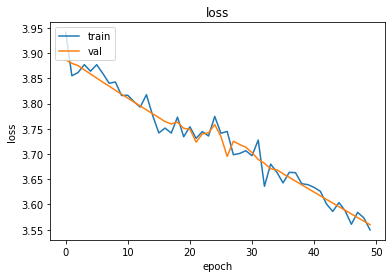

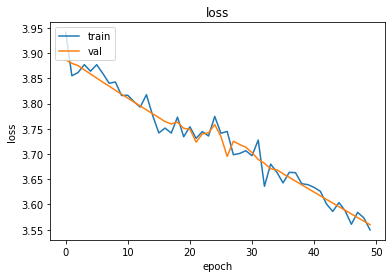

In [33]:
# fitiing
history=model.fit_generator(train_generator,epochs=50,validation_data=val_generator,shuffle=True,
                            callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
#testing 
loss,accuracy,tn,tp,fn,fp=model.evaluate_generator(val_generator)
print(accuracy,tn,tp,fn,fp)

C:\Users\mansi\AppData\Local\Temp/ipykernel_15344/1985064804.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,tn,tp,fn,fp=model.evaluate_generator(val_generator)


0.5 0.0 10.0 0.0 10.0


In [38]:
loss,accuracy,tn,tp,fn,fp = model.evaluate(train_generator)

7/7 [==============================] - 4s 557ms/step - loss: 3.5600 - accuracy: 0.5000 - true_negatives_7: 0.0000e+00 - true_positives_7: 32.0000 - false_negatives_7: 0.0000e+00 - false_positives_7: 32.0000


In [36]:
print(accuracy,tn,tp,fn,fp)

0.5 0.0 32.0 0.0 32.0
